In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [3]:
# Define file paths
data_path = '/content/drive/MyDrive/Colab Notebooks/DSP Project/'
data_1 = data_path + 'Merged_Sorted_Data_Herd_Daily.xlsx'

# Load the Excel files
data = pd.read_excel(data_1)

# Ensure the date column is parsed as a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Sort by the Date column
data = data.sort_values(by='Date')

data

,Herd Name,Date,Lac Avg Days,Weight,Rumination Minutes,Total feed,Average cell count,Day production,Milking cows,Minutes in pasture,Expected Daily Yield,Fat indication,Fat/Protein Ratio,Protein indication,Lactose indication,Concentrate / 100 kg Milk,Number of milkings,Total Amount of Milk Produced,Amount of Milk Separated
0,Main Herd,2016-04-29,226,710.70,375,NaN,100.0,28.5,NaN,NaN,30.4,4.49,1.22,3.68,NaN,NaN,3.1,4105.6,135.6
1,Main Herd,2016-04-30,227,715.19,379,1683.0,107.0,27.4,NaN,NaN,30.1,4.38,1.22,3.58,NaN,44.71,3.2,3952.1,146.7
2,Main Herd,2016-05-01,228,707.96,437,1682.0,113.0,24.5,NaN,NaN,29.7,4.42,1.25,3.54,NaN,43.14,3.0,3534.7,137.4
3,Main Herd,2016-05-02,229,714.28,409,1825.0,156.0,24.9,NaN,NaN,29.3,4.77,1.38,3.47,NaN,41.60,2.8,3584.9,125.5
4,Main Herd,2016-05-03,228,722.51,373,1544.0,131.0,28.2,NaN,NaN,29.1,4.46,1.34,3.32,NaN,39.77,2.8,4087.3,165.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,Main Herd,2024-06-26,207,653.88,567,866.0,139.0,26.2,98.0,1317.0,23.1,4.24,1.36,3.11,NaN,31.94,2.1,2570.5,86.9
2981,Main Herd,2024-06-27,208,654.43,463,891.0,127.0,24.5,98.0,1288.0,23.1,4.17,1.31,3.17,NaN,31.78,2.1,2399.9,98.7
2982,Main Herd,2024-06-28,209,658.47,495,886.0,110.0,25.6,98.0,1280.0,23.2,4.15,1.28,3.23,NaN,31.33,2.1,2506.6,48.9
2983,Main Herd,2024-06-29,210,640.48,529,892.0,120.0,24.6,98.0,1308.0,23.3,4.17,1.27,3.27,NaN,31.19,2.0,2407.3,53.5


In [4]:
# Display a concise summary of the dataframe
print(data.info())

# Generate descriptive statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Herd Name                      2985 non-null   object        
 1   Date                           2985 non-null   datetime64[ns]
 2   Lac Avg Days                   2985 non-null   int64         
 3   Weight                         2985 non-null   float64       
 4   Rumination Minutes             2985 non-null   int64         
 5   Total feed                     2984 non-null   float64       
 6   Average cell count             2526 non-null   float64       
 7   Day production                 2985 non-null   float64       
 8   Milking cows                   1744 non-null   float64       
 9   Minutes in pasture             1744 non-null   float64       
 10  Expected Daily Yield           2985 non-null   float64       
 11  Fat indication   

In [5]:
# Calculate the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100

# Display columns with more than 50% missing values
print(missing_percentage[missing_percentage > 50])

Lactose indication    100.0
dtype: float64


In [6]:
# Drop unnecessary columns
data.drop('Lactose indication', axis=1, inplace=True)
data.drop('Herd Name', axis=1, inplace=True)
data.drop('Date', axis=1, inplace=True)

In [7]:
data

,Lac Avg Days,Weight,Rumination Minutes,Total feed,Average cell count,Day production,Milking cows,Minutes in pasture,Expected Daily Yield,Fat indication,Fat/Protein Ratio,Protein indication,Concentrate / 100 kg Milk,Number of milkings,Total Amount of Milk Produced,Amount of Milk Separated
0,226,710.70,375,NaN,100.0,28.5,NaN,NaN,30.4,4.49,1.22,3.68,NaN,3.1,4105.6,135.6
1,227,715.19,379,1683.0,107.0,27.4,NaN,NaN,30.1,4.38,1.22,3.58,44.71,3.2,3952.1,146.7
2,228,707.96,437,1682.0,113.0,24.5,NaN,NaN,29.7,4.42,1.25,3.54,43.14,3.0,3534.7,137.4
3,229,714.28,409,1825.0,156.0,24.9,NaN,NaN,29.3,4.77,1.38,3.47,41.60,2.8,3584.9,125.5
4,228,722.51,373,1544.0,131.0,28.2,NaN,NaN,29.1,4.46,1.34,3.32,39.77,2.8,4087.3,165.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,207,653.88,567,866.0,139.0,26.2,98.0,1317.0,23.1,4.24,1.36,3.11,31.94,2.1,2570.5,86.9
2981,208,654.43,463,891.0,127.0,24.5,98.0,1288.0,23.1,4.17,1.31,3.17,31.78,2.1,2399.9,98.7
2982,209,658.47,495,886.0,110.0,25.6,98.0,1280.0,23.2,4.15,1.28,3.23,31.33,2.1,2506.6,48.9
2983,210,640.48,529,892.0,120.0,24.6,98.0,1308.0,23.3,4.17,1.27,3.27,31.19,2.0,2407.3,53.5


In [8]:
# List of columns to impute with the mean
columns_to_impute = ['Average cell count', 'Minutes in pasture', 'Milking cows']

# Loop through each column and impute missing values with the mean
for column in columns_to_impute:
    mean_value = data[column].mean()  # Calculate the mean for the column
    data.loc[:, column] = data[column].fillna(mean_value)  # Fill NaN values with the mean

In [9]:
print(data.isnull().sum())

data

Lac Avg Days                     0
Weight                           0
Rumination Minutes               0
Total feed                       1
Average cell count               0
Day production                   0
Milking cows                     0
Minutes in pasture               0
Expected Daily Yield             0
Fat indication                   0
Fat/Protein Ratio                0
Protein indication               0
Concentrate / 100 kg Milk        2
Number of milkings               0
Total Amount of Milk Produced    0
Amount of Milk Separated         0
dtype: int64


,Lac Avg Days,Weight,Rumination Minutes,Total feed,Average cell count,Day production,Milking cows,Minutes in pasture,Expected Daily Yield,Fat indication,Fat/Protein Ratio,Protein indication,Concentrate / 100 kg Milk,Number of milkings,Total Amount of Milk Produced,Amount of Milk Separated
0,226,710.70,375,NaN,100.0,28.5,131.916858,972.587729,30.4,4.49,1.22,3.68,NaN,3.1,4105.6,135.6
1,227,715.19,379,1683.0,107.0,27.4,131.916858,972.587729,30.1,4.38,1.22,3.58,44.71,3.2,3952.1,146.7
2,228,707.96,437,1682.0,113.0,24.5,131.916858,972.587729,29.7,4.42,1.25,3.54,43.14,3.0,3534.7,137.4
3,229,714.28,409,1825.0,156.0,24.9,131.916858,972.587729,29.3,4.77,1.38,3.47,41.60,2.8,3584.9,125.5
4,228,722.51,373,1544.0,131.0,28.2,131.916858,972.587729,29.1,4.46,1.34,3.32,39.77,2.8,4087.3,165.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,207,653.88,567,866.0,139.0,26.2,98.000000,1317.000000,23.1,4.24,1.36,3.11,31.94,2.1,2570.5,86.9
2981,208,654.43,463,891.0,127.0,24.5,98.000000,1288.000000,23.1,4.17,1.31,3.17,31.78,2.1,2399.9,98.7
2982,209,658.47,495,886.0,110.0,25.6,98.000000,1280.000000,23.2,4.15,1.28,3.23,31.33,2.1,2506.6,48.9
2983,210,640.48,529,892.0,120.0,24.6,98.000000,1308.000000,23.3,4.17,1.27,3.27,31.19,2.0,2407.3,53.5


In [10]:
# Drop rows that have NaN values in any of the columns
data_cleaned = data.dropna()

# Check the number of rows remaining after dropping NaNs
print(f"Number of rows remaining after dropping rows with NaNs: {len(data_cleaned)}")

Number of rows remaining after dropping rows with NaNs: 2983


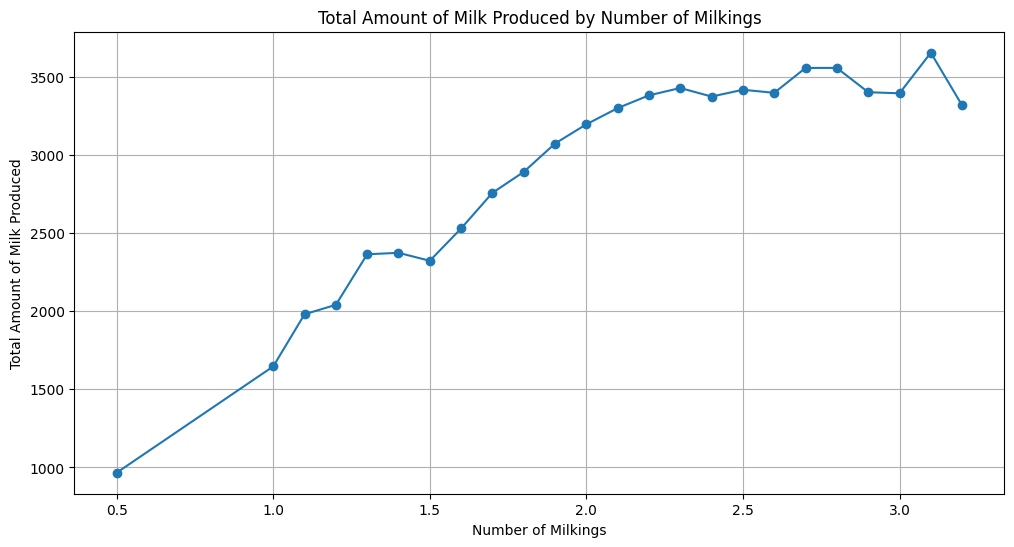

In [11]:
# Grouping data by Lactation Number and averaging Day Production
grouped_data = data.groupby('Number of milkings')['Total Amount of Milk Produced'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(grouped_data['Number of milkings'], grouped_data['Total Amount of Milk Produced'], marker='o')
plt.title('Total Amount of Milk Produced by Number of Milkings')
plt.xlabel('Number of Milkings')
plt.ylabel('Total Amount of Milk Produced')
plt.grid(True)
plt.show()

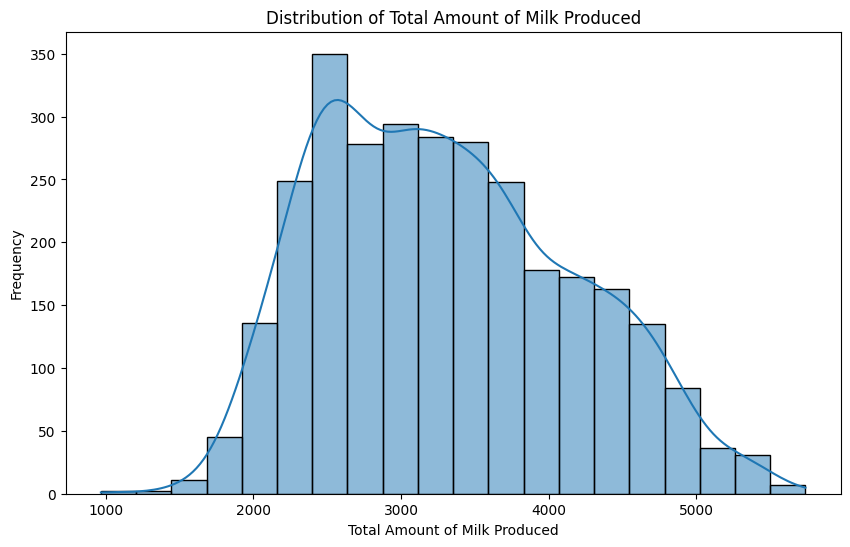

In [12]:
# Histogram of Total amount of Milk Produced
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Amount of Milk Produced'], bins=20, kde=True)
plt.title('Distribution of Total Amount of Milk Produced')
plt.xlabel('Total Amount of Milk Produced')
plt.ylabel('Frequency')
plt.show()

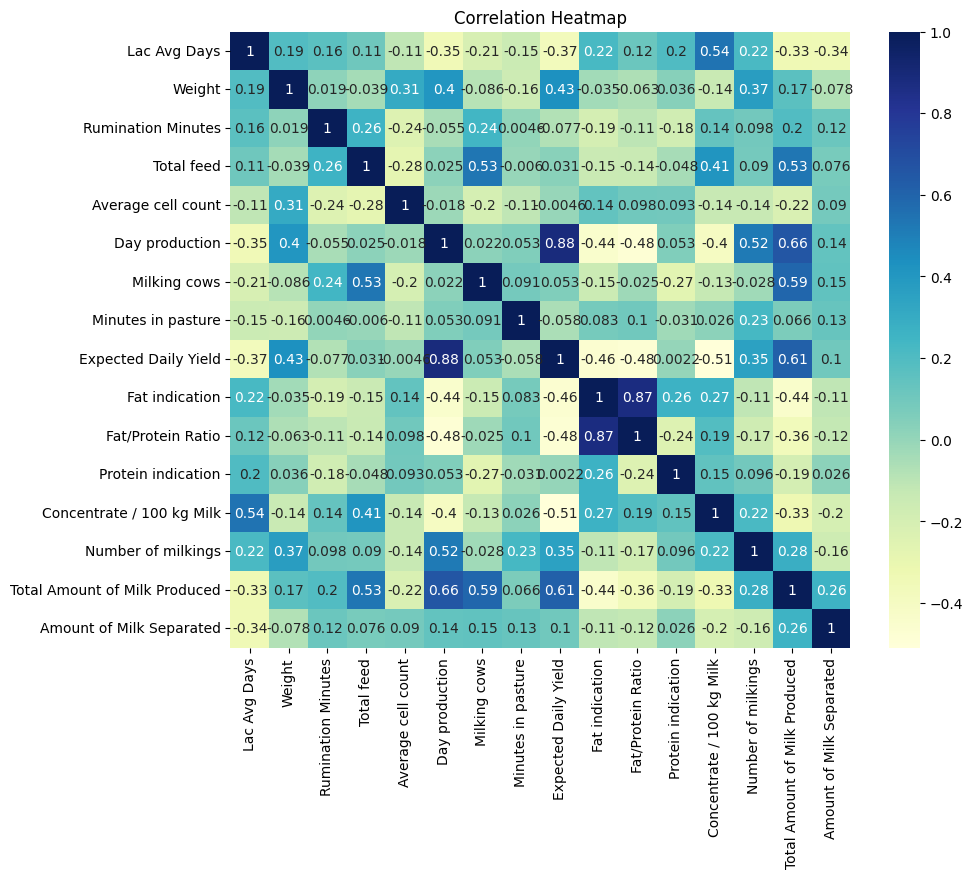

In [13]:
# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# X is the feature matrix
# y is the target variable
X = data.drop(['Day production', 'Expected Daily Yield'], axis=1)  # Drop target and any other non-relevant columns
y = data['Day production']

# First, split into train (70%) and temp (30%) data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Next, split the temp data into validation (20% of total) and test (10% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

Train size: 2089, Validation size: 600, Test size: 296


In [15]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Initialize an empty dictionary to store results
results = {}

# Initialize a SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the training and validation sets
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining and validating {name}...")

    # Train the model on the imputed training set
    model.fit(X_train_imputed, y_train)

    # Predict on the imputed validation set
    y_val_pred = model.predict(X_val_imputed)

    # Calculate metrics
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    # Print validation performance
    print(f"Validation MSE: {mse_val}")
    print(f"Validation R-squared: {r2_val}")

    # Store results for comparison
    results[name] = {
        'Validation MSE': mse_val,
        'Validation R2': r2_val
    }


Training and validating Linear Regression...
Validation MSE: 3.1414712101474085
Validation R-squared: 0.832909706888036

Training and validating Decision Tree...
Validation MSE: 2.419216666666667
Validation R-squared: 0.8713253775399984

Training and validating Random Forest...
Validation MSE: 0.8968721799999975
Validation R-squared: 0.9522966707585603

Training and validating Gradient Boosting...
Validation MSE: 1.3553713663092415
Validation R-squared: 0.9279097646540113

Training and validating XGBoost...
Validation MSE: 0.902614173361571
Validation R-squared: 0.9519912624674599


In [17]:
# Display the validation results for each model
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"  Validation MSE: {metrics['Validation MSE']}")
    print(f"  Validation R2: {metrics['Validation R2']}")


Linear Regression:
  Validation MSE: 3.1414712101474085
  Validation R2: 0.832909706888036

Decision Tree:
  Validation MSE: 2.419216666666667
  Validation R2: 0.8713253775399984

Random Forest:
  Validation MSE: 0.8968721799999975
  Validation R2: 0.9522966707585603

Gradient Boosting:
  Validation MSE: 1.3553713663092415
  Validation R2: 0.9279097646540113

XGBoost:
  Validation MSE: 0.902614173361571
  Validation R2: 0.9519912624674599


In [18]:
# Choose the best model based on validation performance
best_model = models['Random Forest']

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Calculate performance metrics on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print test set performance
print("\nTest Set Performance of Best Model (Random Forest):")
print(f"Test MSE: {mse_test}")
print(f"Test R-squared: {r2_test}")


Test Set Performance of Best Model (Random Forest):
Test MSE: 0.8930219966216224
Test R-squared: 0.952440947395983


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_depth': [10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]         # Method of selecting samples for training each tree
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)  # Negate to convert to positive MSE

# Train the best model on the full training set
best_rf_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score (MSE): 0.9467455974692126


In [20]:
# Predict on the validation set
y_val_pred = best_rf_model.predict(X_val)

# Calculate MSE and R-squared on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse_val}")
print(f"Validation R-squared: {r2_val}")

# Predict on the test set
y_test_pred = best_rf_model.predict(X_test)

# Calculate MSE and R-squared on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test R-squared: {r2_test}")

Validation MSE: 0.8658932527430534
Validation R-squared: 0.9539443949264397
Test MSE: 0.8456246347989888
Test R-squared: 0.9549651557948152
